In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

## Where the Key Signature is defined

In [2]:
# Start to set the Key Signature
settings << KeySignature()
settings % KeySignature() % (str(), (Key(), str()), (Scale(), str()))

('', 'C', 'Major')

## Where a Chord progression is constructed

### Constructing Chords with Degrees
- The Chord Pitch has no Scale by default, this means that the multiple keys on the chord are based on degrees;
- The advantage of basing the construction of the Chord on degrees, is that you don't have to worry if it's minor, major or augmented,
the final result will always be the right one!

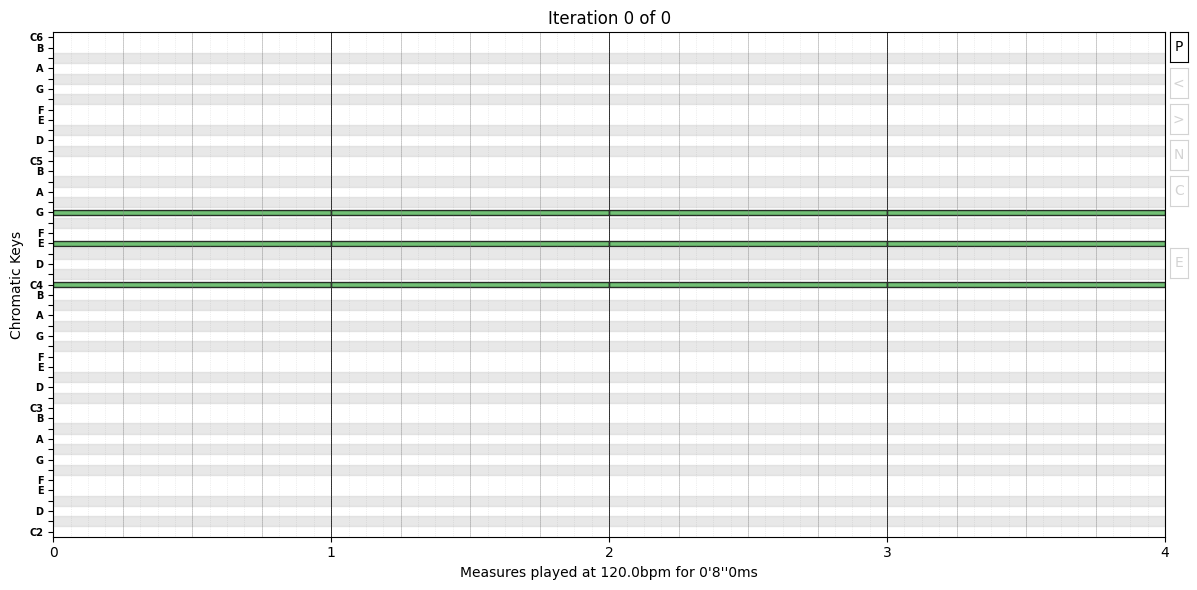

In [3]:
# For this very simple example we can use the Element Chord
# However PitchChord offers much more options and thus it's preferable
chord_progression = Chord() / 2   # The / operator does a stacking by duration
chord_progression *= 2            # The inline * operator does a stacking by Measure
chord_progression >> Plot()

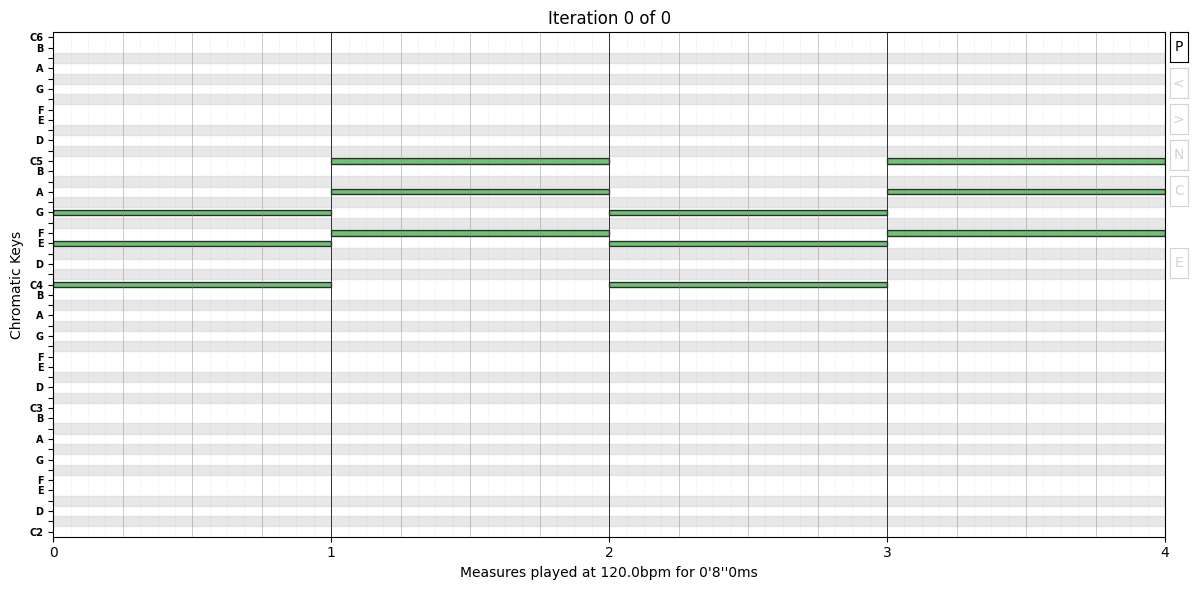

In [4]:
# It's possible to set the chord degrees directly with strings
chord_progression << Foreach("I", "IV")
chord_progression >> Plot()

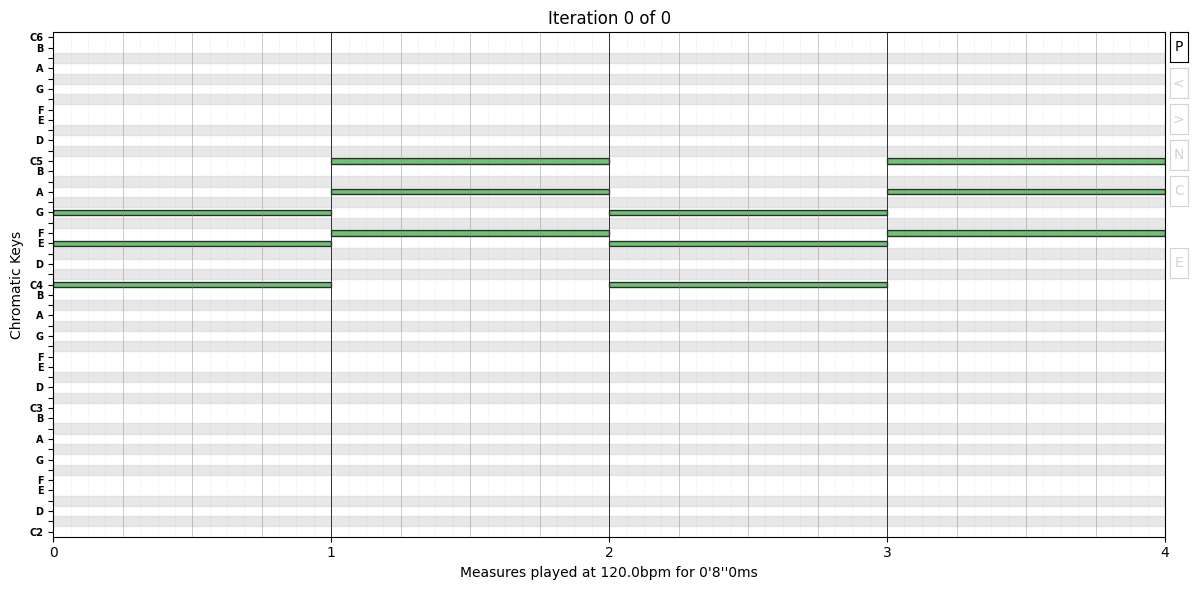

In [5]:
# Or indirectly trough a Degree with strings
chord_progression << Foreach("I", "IV")**Degree()
chord_progression >> Plot()

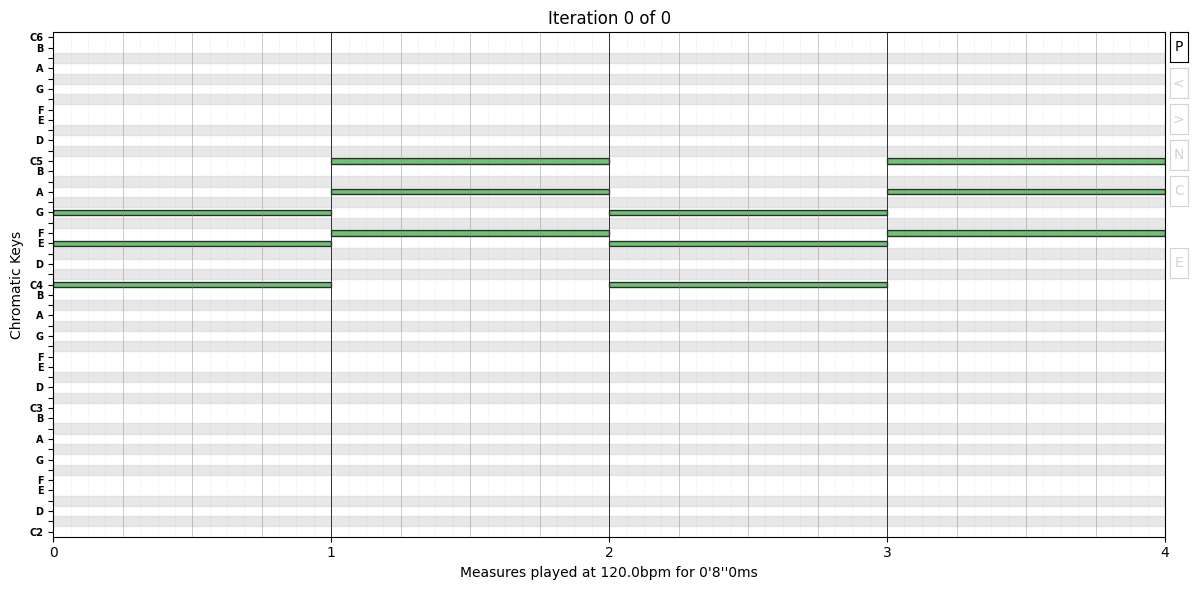

In [6]:
# This is however more efficient and explicit though
chord_progression << Foreach(1, 4)**Degree()
chord_progression >> Plot()

In [7]:
# Final proof it has no Scale
chord_progression[1] % Scale() % list()

[]

### Constructing Chords with Scales
- To construct the Chord with scales, it's important to set the correct scale on the chord being defined;
- After the correct scale being defined, it's time to set the Degree of the Chord Root Key.

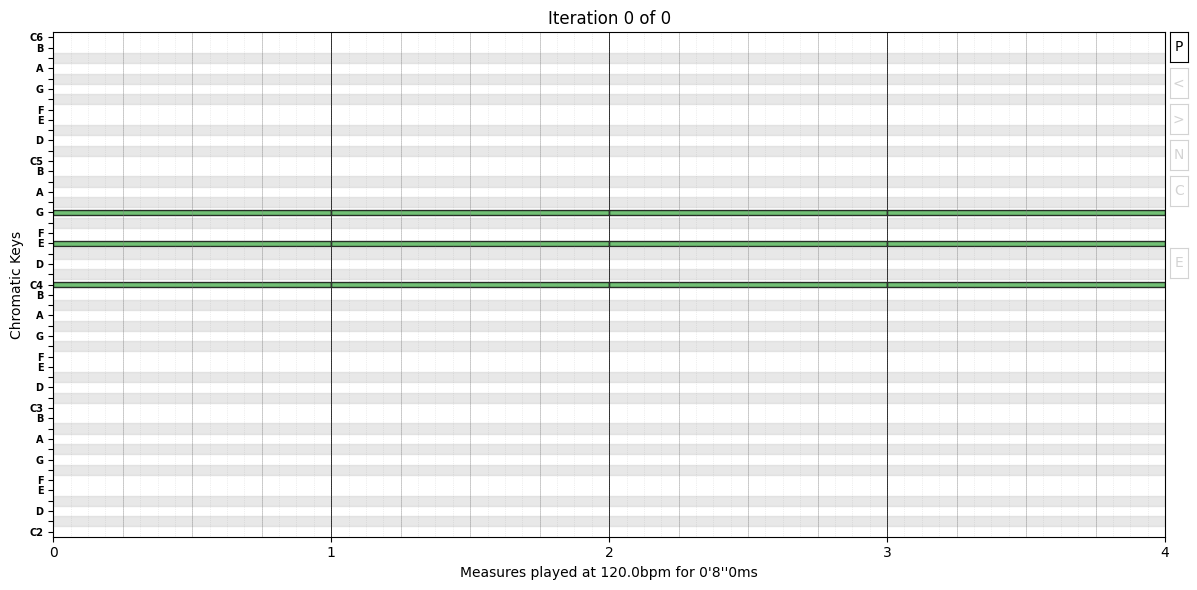

In [8]:
# For this very simple example we can use the Element Chord
# However PitchChord offers much more options and thus it's preferable
chord_progression = Chord() / 2   # The / operator does a stacking by duration
chord_progression *= 2            # The inline * operator does a stacking by Measure
chord_progression >> Plot()

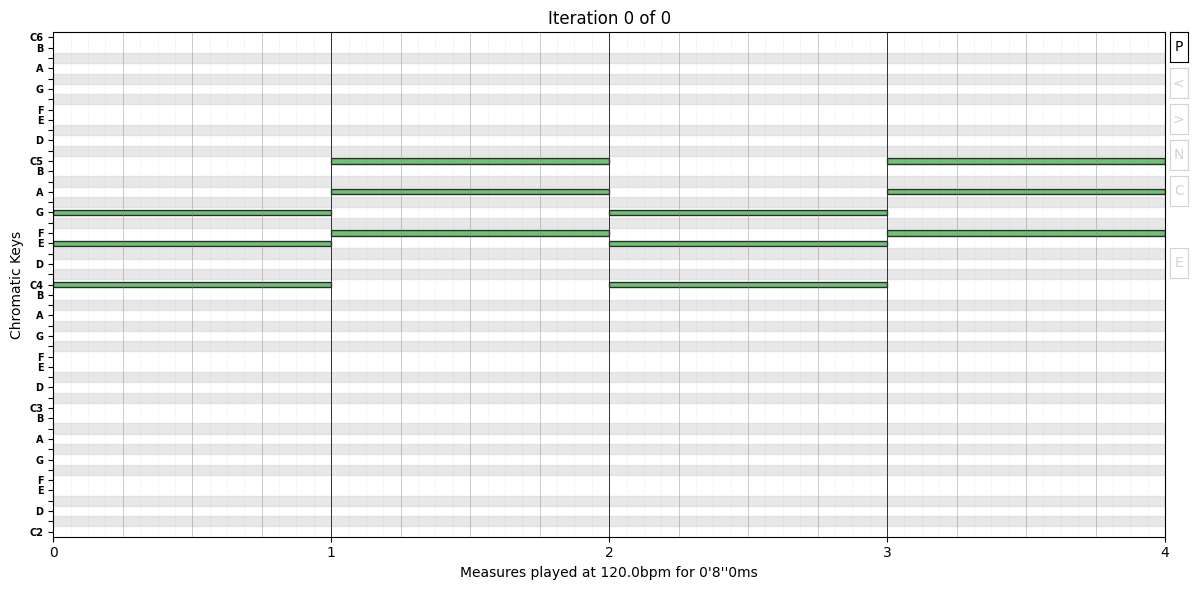

In [9]:
chord_progression << Scale("Major")    # Where the scale is defined
chord_progression << Foreach("I", "IV")
chord_progression >> Plot()

In [10]:
# Final proof it has a Scale
chord_progression[1] % Scale() % list()

[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]

In [11]:
# Time to listen the Chord Progression 2 times
chord_progression * 2 >> Play()

## More elaborated Chord Progressions in more suited instruments

In [12]:
# Sets the voice on Channel 4 as a Horn
# The @ is equivalent to >> but with much higher precedence than % and always result in a Copy
ProgramChange(Channel(4), "Horn") @ Play() % int()

61

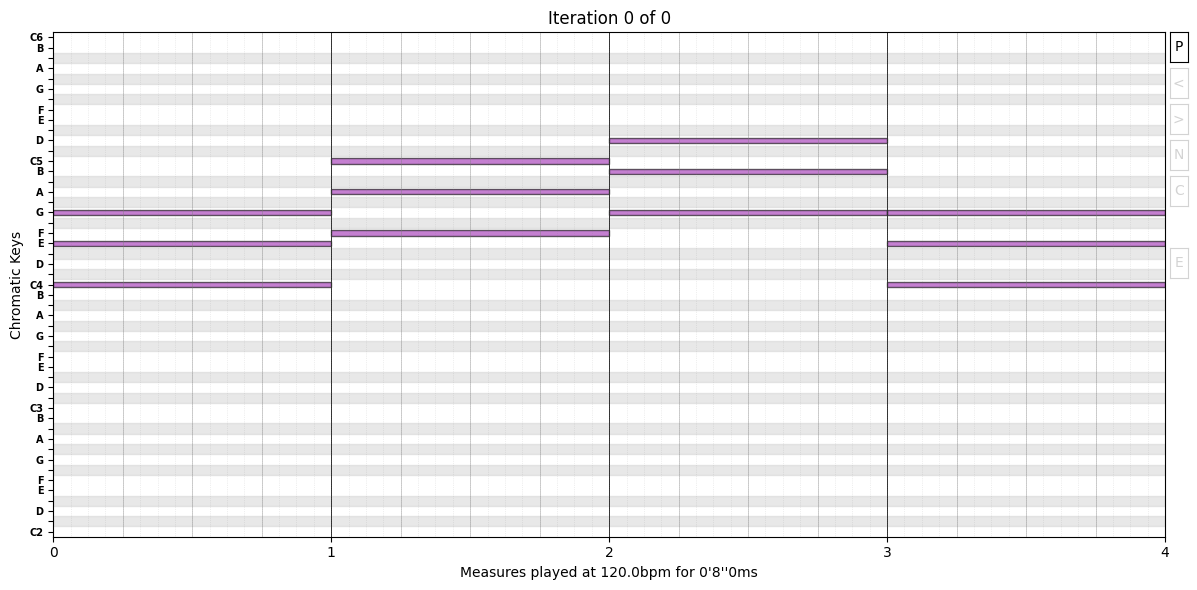

In [13]:
chord_progression = PitchChord(Channel(4), Velocity(75)) / 4
chord_progression << Foreach(1, 4, 5, 1)**Degree()
chord_progression >> Plot()

In [14]:
chord_progression * 2 >> Play()

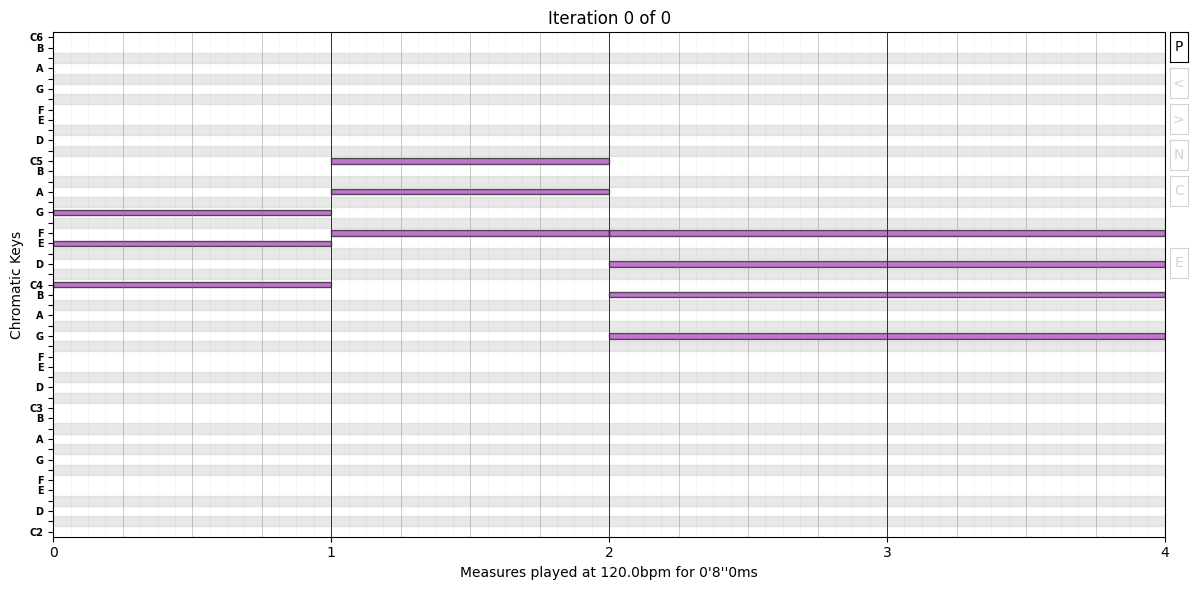

In [15]:
dominant_chord = PitchChord(Channel(4), Velocity(80)) / 3
dominant_chord << Foreach(1, 4, 5)**Degree() << Last()**NoteValue(2) << Last()**SubtractR(1)**[1.0, 3.0, 5.0, 7.0] << Last()**Octave(3)
dominant_chord >> Plot()

In [16]:
dominant_chord / 2 >> Play()